# A2 CLUSTERING

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix
import seaborn as sb

## Read the cleaned data ftom the csv file. 

In [2]:
df=pd.read_csv('./GTC_clean.csv', sep=';')

In [3]:
df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


## Scatter plot the LB and AC labeled by NSP. 

In [4]:
X = df[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
       'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median',
       'Variance', 'Tendency']]
y1 = df['NSP']
y2=df['CLASS']

In [5]:
X=X.to_numpy()
y1=y1.to_numpy()
y2=y2.to_numpy()

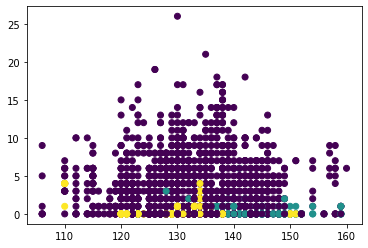

In [8]:
plt.scatter(X[:,0],X[:,1] ,c=y1)
plt.savefig('./lb_ac_nsp_scatterplot.png')
plt.show()


## Scatter plot the LB and AC labeling by CLASS (FHR)

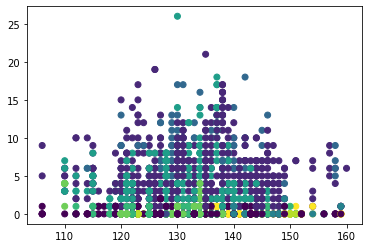

In [10]:

plt.scatter(X[:,0],X[:,1] ,c=y2)
plt.savefig('./lb_ac_class_scatterplot.png')
plt.show()


## Normalize our data with MinMax Scaler. 

In [11]:
scaler =MinMaxScaler()
scaled_x = scaler.fit_transform(X)#scaled_x the normalized data
x=scaler.inverse_transform(scaled_x) #x is the true dataset.

## Implement Kmeans asking for 3 clusters in order to compare it with NSP scatter plot. 

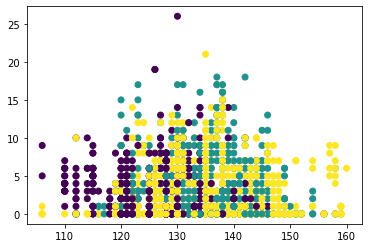

In [12]:

kmeans = KMeans(n_clusters=3, random_state=0).fit(scaled_x)
labels_y1 = kmeans.labels_
plt.scatter(x[:,0],x[:,1] ,c=labels_y1)
plt.savefig('./lb_ac_kmeans_scatterplot.png')
plt.show()


In [13]:
print("Kmeans predictions: ", labels_y1)
print("True NSP labels: ", y1)




Kmeans predictions:  [1 0 0 ... 1 1 2]
True NSP labels:  [2. 1. 1. ... 2. 2. 1.]


In [14]:
df['Kmeans(NSP)']=DataFrame(labels_y1)
df.head()


,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,Kmeans(NSP)
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0,1
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0,0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0,0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0,1
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0,1


## CrossTab Validation 

In [15]:
ct_nsp = pd.crosstab(df['NSP'], df['Kmeans(NSP)'])
ct_nsp

Kmeans(NSP),0,1,2
NSP,,,
1.0,416,596,636
2.0,18,68,206
3.0,100,15,59


<AxesSubplot:xlabel='Kmeans(NSP)', ylabel='NSP'>

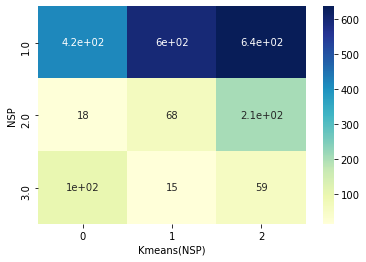

In [16]:
sb.heatmap(ct_nsp,cmap="YlGnBu", annot=True)

In [17]:
#in the case of a better display of the confusion matrix.
#df.loc[df['Kmeans(NSP)'] == 2, 'Kmeans(NSP)'] = 2
#df.loc[df['Kmeans(NSP)'] == 1, 'Kmeans(NSP)'] = 3
#df.loc[df['Kmeans(NSP)'] == 0, 'Kmeans(NSP)'] = 1

## Confusion Matrix 

In [18]:
km_nsp_cf = confusion_matrix(df['NSP'], df['Kmeans(NSP)'])
km_nsp_cf

array([[  0,   0,   0,   0],
       [416, 596, 636,   0],
       [ 18,  68, 206,   0],
       [100,  15,  59,   0]], dtype=int64)

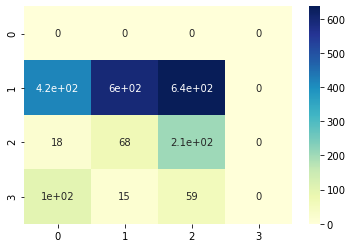

In [20]:
sb.heatmap(km_nsp_cf,cmap="YlGnBu", annot=True)
plt.savefig("./nsp_kmeans_cm.png")

## Implement Kmeans asking for 10 clusters in order to compare it with CLASS(FHR) scatter plot

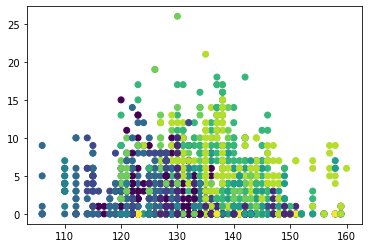

In [22]:

kmeans = KMeans(n_clusters=10, random_state=0).fit(scaled_x)
labels_y2 = kmeans.labels_

plt.scatter(x[:,0],x[:,1] ,c=labels_y2)
plt.savefig("./fhr_kmeans.png")
plt.show()

In [23]:
print("Kmeans predictions: ", labels_y2)
print("True CLASS: ", y2)

Kmeans predictions:  [0 2 2 ... 5 5 1]
True CLASS:  [9. 6. 6. ... 5. 5. 1.]


In [24]:
df['Kmeans(CLASS)']=DataFrame(labels_y2)
df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,Kmeans(NSP),Kmeans(CLASS)
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0,1,0
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0,0,2
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0,0,2
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0,1,6
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0,1,6


In [25]:
ct_class = pd.crosstab(df['CLASS'], df['Kmeans(CLASS)'])
ct_class

Kmeans(CLASS),0,1,2,3,4,5,6,7,8,9
CLASS,,,,,,,,,,
1.0,40,101,0,102,0,66,15,6,36,17
2.0,56,26,26,115,3,38,78,57,176,0
3.0,20,1,1,19,0,4,1,1,4,0
4.0,3,0,2,1,0,12,40,7,16,0
5.0,0,12,0,0,0,23,11,1,23,2
6.0,54,0,74,30,11,12,84,60,7,0
7.0,79,0,45,20,22,11,51,24,0,0
8.0,7,0,8,0,90,0,0,2,0,0
9.0,5,13,0,0,0,3,0,0,0,46


<AxesSubplot:xlabel='Kmeans(CLASS)', ylabel='CLASS'>

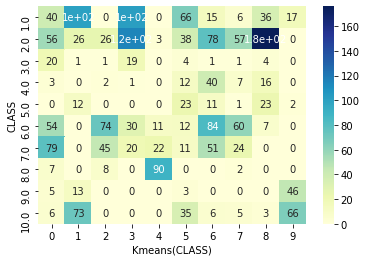

In [26]:
sb.heatmap(ct_class,cmap="YlGnBu", annot=True)

In [27]:
km_class_cf = confusion_matrix(df['CLASS'], df['Kmeans(CLASS)'])
km_class_cf

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 40, 101,   0, 102,   0,  66,  15,   6,  36,  17,   0],
       [ 56,  26,  26, 115,   3,  38,  78,  57, 176,   0,   0],
       [ 20,   1,   1,  19,   0,   4,   1,   1,   4,   0,   0],
       [  3,   0,   2,   1,   0,  12,  40,   7,  16,   0,   0],
       [  0,  12,   0,   0,   0,  23,  11,   1,  23,   2,   0],
       [ 54,   0,  74,  30,  11,  12,  84,  60,   7,   0,   0],
       [ 79,   0,  45,  20,  22,  11,  51,  24,   0,   0,   0],
       [  7,   0,   8,   0,  90,   0,   0,   2,   0,   0,   0],
       [  5,  13,   0,   0,   0,   3,   0,   0,   0,  46,   0],
       [  6,  73,   0,   0,   0,  35,   6,   5,   3,  66,   0]],
      dtype=int64)

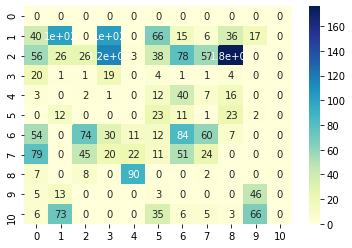

In [28]:

sb.heatmap(km_class_cf,cmap="YlGnBu", annot=True)
plt.savefig("./fhr_kmeans_cm.png")

## Implementing DBSCAN  

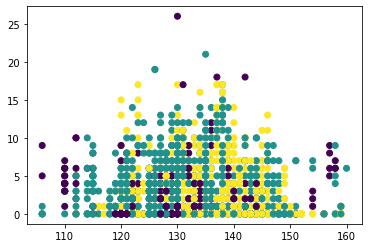

In [30]:

dbscan = DBSCAN(eps=0.5, min_samples=50).fit(scaled_x) # define the model
labels_db_y = dbscan.labels_


plt.scatter(x[:,0],x[:,1],c=labels_db_y)
plt.savefig("./db_scan.png")
plt.show()

In [31]:
print("DBSCAN predictions: ", labels_db_y)
print("True values of NSP: ", y1)

DBSCAN predictions:  [-1  0  0 ...  1  1  0]
True values of NSP:  [2. 1. 1. ... 2. 2. 1.]


In [32]:
df['DBSCAN pred.']=DataFrame(labels_db_y)

In [33]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,Kmeans(NSP),Kmeans(CLASS),DBSCAN pred.
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,120.0,137.0,121.0,73.0,1.0,9.0,2.0,1,0,-1
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,141.0,136.0,140.0,12.0,0.0,6.0,1.0,0,2,0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,141.0,135.0,138.0,13.0,0.0,6.0,1.0,0,2,0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,137.0,134.0,137.0,13.0,1.0,6.0,1.0,1,6,1
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,137.0,136.0,138.0,11.0,1.0,2.0,1.0,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,153.0,150.0,152.0,2.0,0.0,5.0,2.0,2,1,0
2110,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,152.0,148.0,151.0,3.0,1.0,5.0,2.0,1,5,1
2111,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,153.0,148.0,152.0,4.0,1.0,5.0,2.0,1,5,1
2112,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,152.0,147.0,151.0,4.0,1.0,5.0,2.0,1,5,1


In [34]:
ct_dbscan = pd.crosstab(df['NSP'], df['DBSCAN pred.'])
ct_dbscan

DBSCAN pred.,-1,0,1
NSP,,,
1.0,171,843,634
2.0,44,120,128
3.0,97,47,30


<AxesSubplot:xlabel='DBSCAN pred.', ylabel='NSP'>

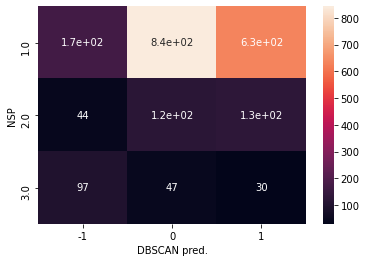

In [35]:
sb.heatmap(ct_dbscan, annot=True)

In [36]:
dbscan_nsp_cf = confusion_matrix(df['NSP'], df['DBSCAN pred.'])
dbscan_nsp_cf

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [171, 843, 634,   0,   0],
       [ 44, 120, 128,   0,   0],
       [ 97,  47,  30,   0,   0]], dtype=int64)

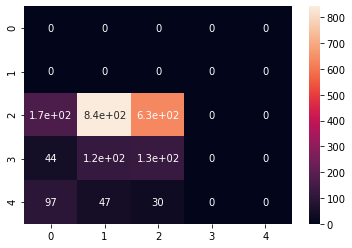

In [37]:

sb.heatmap(dbscan_nsp_cf, annot=True)
plt.savefig("./db_scan_cm.png")

## Implementing OPTICS 

In [39]:
optics = OPTICS(min_samples=50, max_eps=0.5) # define the model
optics = optics.fit(scaled_x) # fit the model
labels_y_optics = optics.labels_

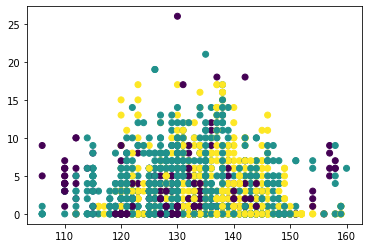

In [40]:
plt.scatter(x[:,0],x[:,1],c=labels_y_optics)
plt.savefig("./optics.png")
plt.show()


In [41]:
print("OPTICS predictions: ", labels_y_optics)
print("True values of NSP: ", y1)

OPTICS predictions:  [-1  0  0 ...  1  1  0]
True values of NSP:  [2. 1. 1. ... 2. 2. 1.]


In [42]:
df['OPTICS pred.']=DataFrame(labels_y_optics)

In [43]:
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Mean,Median,Variance,Tendency,CLASS,NSP,Kmeans(NSP),Kmeans(CLASS),DBSCAN pred.,OPTICS pred.
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,137.0,121.0,73.0,1.0,9.0,2.0,1,0,-1,-1
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,136.0,140.0,12.0,0.0,6.0,1.0,0,2,0,0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,135.0,138.0,13.0,0.0,6.0,1.0,0,2,0,0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,134.0,137.0,13.0,1.0,6.0,1.0,1,6,1,-1
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,136.0,138.0,11.0,1.0,2.0,1.0,1,6,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,150.0,152.0,2.0,0.0,5.0,2.0,2,1,0,0
2110,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,148.0,151.0,3.0,1.0,5.0,2.0,1,5,1,1
2111,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,148.0,152.0,4.0,1.0,5.0,2.0,1,5,1,1
2112,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,147.0,151.0,4.0,1.0,5.0,2.0,1,5,1,1


In [44]:
ct_optics = pd.crosstab(df['NSP'], df['OPTICS pred.'])
ct_optics

OPTICS pred.,-1,0,1
NSP,,,
1.0,173,843,632
2.0,46,120,126
3.0,100,47,27


<AxesSubplot:xlabel='OPTICS pred.', ylabel='NSP'>

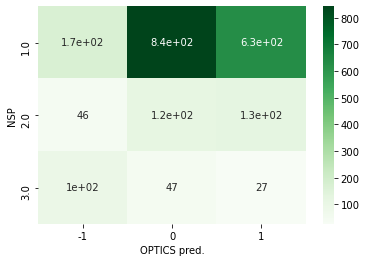

In [45]:
sb.heatmap(ct_optics, cmap='Greens',annot=True)

In [46]:
optics_nsp_cf = confusion_matrix(df['NSP'], df['OPTICS pred.'])
optics_nsp_cf

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [173, 843, 632,   0,   0],
       [ 46, 120, 126,   0,   0],
       [100,  47,  27,   0,   0]], dtype=int64)

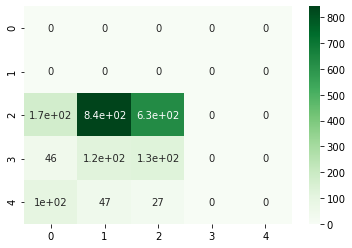

In [47]:

sb.heatmap(optics_nsp_cf, cmap='Greens',annot=True)
plt.savefig("./optics_cm.png")

In [49]:
df.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Mean,Median,Variance,Tendency,CLASS,NSP,Kmeans(NSP),Kmeans(CLASS),DBSCAN pred.,OPTICS pred.
0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,137.0,121.0,73.0,1.0,9.0,2.0,1,0,-1,-1
1,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,136.0,140.0,12.0,0.0,6.0,1.0,0,2,0,0
2,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,135.0,138.0,13.0,0.0,6.0,1.0,0,2,0,0
3,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,134.0,137.0,13.0,1.0,6.0,1.0,1,6,1,-1
4,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,136.0,138.0,11.0,1.0,2.0,1.0,1,6,1,-1
